# Tutorial 3: Planetary Surfaces
This tutorial demonstrates how to use the **Planetary.Surfaces** module to define a PlanetaryRegion object to store information about a defined region on a planetary body.

## 3.1. Introduction
In the previous tutorial, we used the **Planetary.Objects** module to create an instance of a planetary object (either a **Planet**, **Moon**, or **Asteroid**), containing available data of a particular Solar System object. We then used the **Planetary.Bodies** module to create a **ConstDensityBody** object, modellign the bulk physical structure of the planetary object.

The **Planetary.Surfaces** module is designed to create finer detailed models of specific regions on the surface of the planetary body.


## 3.2. Planetary Regions
The **PlanetaryRegion** class provides tools to organize various GIS data sources available for a define region on a planetary body. The region’s extent and datasets are defined in an xls configuration file containing three worksheets:
* Extent: defining the bounding box and spatial reference system of the region;
* WMS: defining a list of WMS raster layers to be included; and
* Raster: defining a list of additional raster files to be included.

#### Defining the Extent of the Region
The extent sheet provides inputs for basic metadata for the region of interest, including a name and description for the region, and the directory location in which to store any raster files generated by the class methods. The extent of the region may be defined in this worksheet in one of two ways:
* Bounding box: defining the max/min values of the latitude and longitude; or
* Location and Range: defining the central coordinate (lat,long) and range in the latitude and longitude.

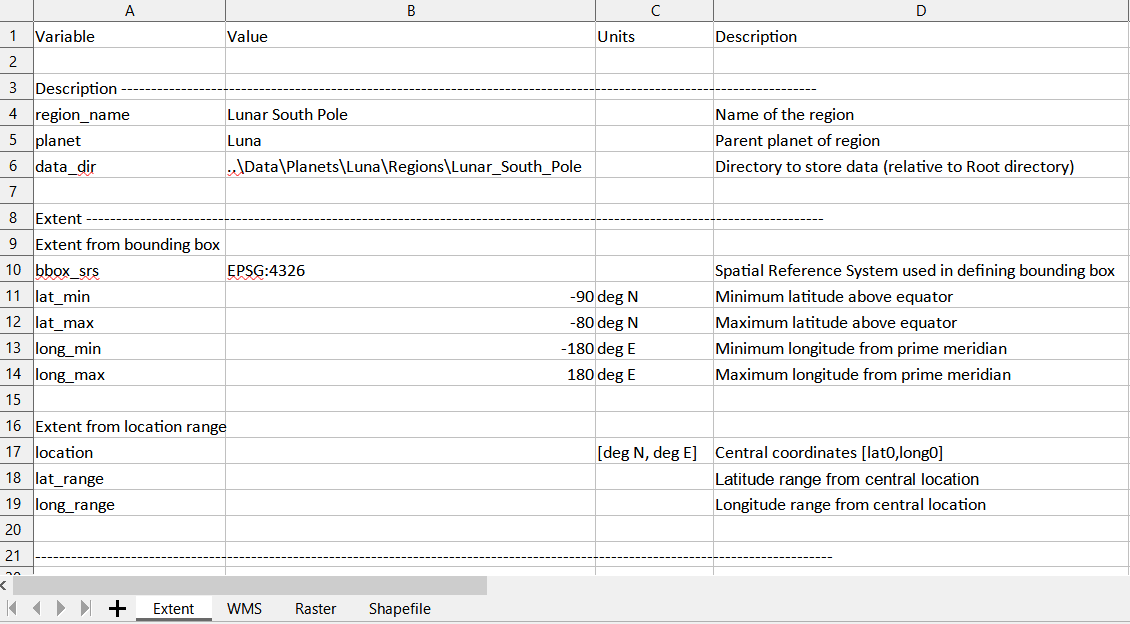

#### Defining WMS Contents
Geospatial data are often stored online in Web Map Service (WMS) protocols. The WMS sheet of the config file provides a way to specify the details of WMS layers of interest to include in the region model. A new row can be entered for each layer specifying the WMS url, the spatial reference system (SRS), layer name, requested pixel resolution, filename, and additional keyword arguments that may be required as inputs to querying the WMS (such as dates and times). The figure below shows an example of the WMS configuration data defining a number of layers from the [Lunaserv WMS](https://lunaserv.lroc.asu.edu/). In this example, the source SRS of the WMS is specified in Equatorial coordinates ([EPSG:4326](https://spatialreference.org/ref/epsg/wgs-84/)), while the requested output SRS is specified in Moon South Pole Stereographic ([IAU2000:30120](https://spatialreference.org/ref/iau2000/30120/)). This information is used in class methods that use GDAL to download and reproject the requested images.
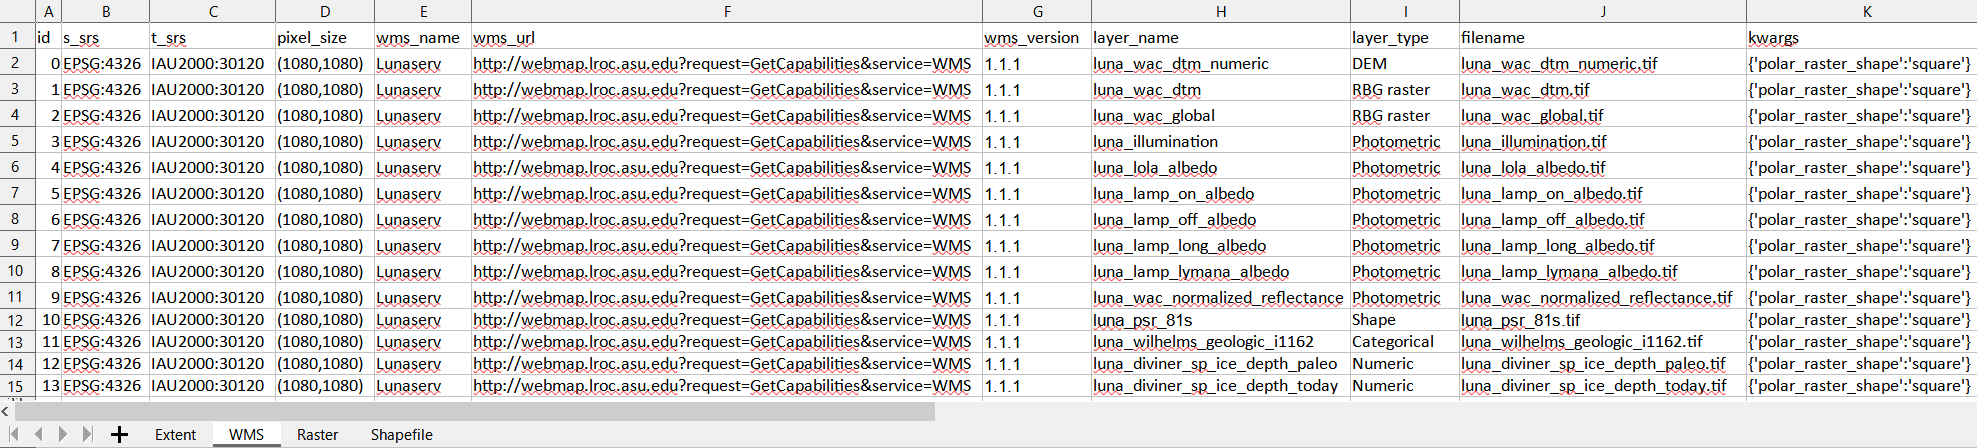


#### Defining Raster Data
Additional externally generated raster files can be included in the region model by listing their details in the Raster worksheet of the config file. Required parameters to be listed include the name and path of the file. Additional metadata such as the source and a categorical data type can be added to each raster. The figure below shows an example config file listing a number of external raster files.


### 3.2.1. Creating a Region
The Data folder of this tutorial includes an example config file defining a region centered at the Lunar South Pole. Copy this file to the data location specified in the Extent sheet of the config file: ~/sr_data/Data/Planets/Luna/Regions/Luna_South_Pole

A **PlanetaryRegion** object can then be instantiated by parsing the path of the config file.

In [7]:
# Imports
from sr_tools.datasets import Datasets
from sr_tools.Planetary.Surfaces import PlanetaryRegion

# Define the location of the config file
DATA_DIR = Datasets.get_data_home() # Root data directory
configfile = DATA_DIR/'Planets'/'Luna'/'Regions'/'Lunar_South_Pole'/'config.xlsx' # Config file

# Instantiate the region
LunaRegion = PlanetaryRegion(configfile) # Instantiate

# Save the requested WMS layers to raster files
# LunaRegion.generate_wms_rasters()

The final step in the code block above implements the **generate_wms_rasters()** method that uses the OSWLIB Python package to perform WMS queries on each of the requested raster datasets that are then saved as raster files in the specified directory of the region. After running this, you should find a set of raster files in the region directory.
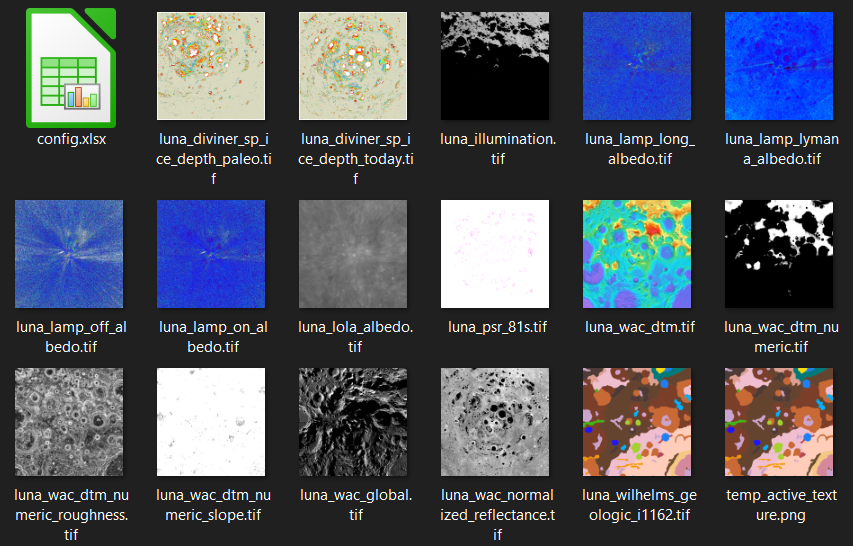

### 3.2.2. Inspecting Raster Layers
During instantiation, the **PlanetaryRegion** object reads in details from the config file.
The object contains class methods to list details of the raster layers as Pandas Dataframes. This includes information listed in the config file, along with other details such as pixel size read from each file.

In [8]:
# Print a list of rasters
print(LunaRegion.rasters)

# Print a list of raster details
LunaRegion.list_all_layers()

['luna_wac_dtm_numeric.tif', 'luna_wac_dtm.tif', 'luna_wac_global.tif', 'luna_illumination.tif', 'luna_lola_albedo.tif', 'luna_lamp_on_albedo.tif', 'luna_lamp_off_albedo.tif', 'luna_lamp_long_albedo.tif', 'luna_lamp_lymana_albedo.tif', 'luna_wac_normalized_reflectance.tif', 'luna_psr_81s.tif', 'luna_wilhelms_geologic_i1162.tif', 'luna_diviner_sp_ice_depth_paleo.tif', 'luna_diviner_sp_ice_depth_today.tif', 'SP_TT.tif', 'SP_IFI.tif', 'LDEM_80S_80M.JP2', 'NAC_POLE_PSR_SOUTH_STRETCH_20180126_164600.tif', 'LOLA_81S_SP_PSR_STEREOGRAPHIC_10KM2_20170227.tif', 'luna_wac_dtm_numeric_slope.tif', 'luna_wac_dtm_numeric_roughness.tif', 'proximity_psr_81s.tif', 'custom_constraints.tif']


,layer_name,filename,filepath,source,pixel_size
0,luna_wac_dtm_numeric,luna_wac_dtm_numeric.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
1,luna_wac_dtm,luna_wac_dtm.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
2,luna_wac_global,luna_wac_global.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
3,luna_illumination,luna_illumination.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
4,luna_lola_albedo,luna_lola_albedo.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
5,luna_lamp_on_albedo,luna_lamp_on_albedo.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
6,luna_lamp_off_albedo,luna_lamp_off_albedo.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
7,luna_lamp_long_albedo,luna_lamp_long_albedo.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
8,luna_lamp_lymana_albedo,luna_lamp_lymana_albedo.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
9,luna_wac_normalized_reflectance,luna_wac_normalized_reflectance.tif,C:\Users\scott\sr_data\Data\Planets\Luna\Regio...,http://webmap.lroc.asu.edu?request=GetCapabili...,"(1080,1080)"
